# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

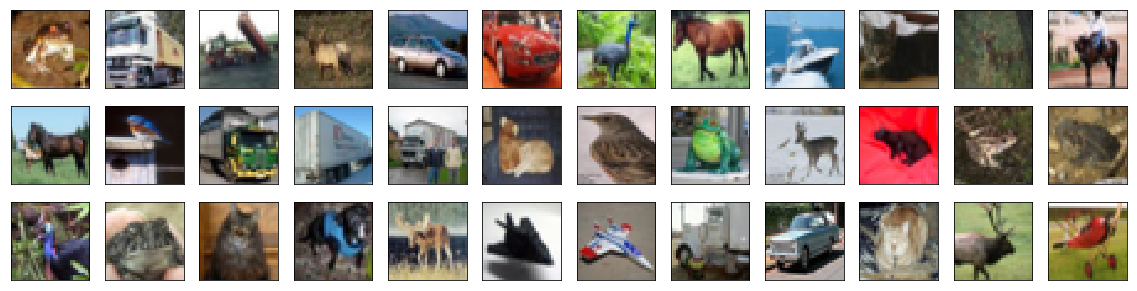

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

### 6. Compile the Model 

In [16]:
# compile the model
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

### 7. Train the Model 

In [17]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 15s - loss: 1.8550 - acc: 0.3183 - val_loss: 1.6760 - val_acc: 0.3940

Epoch 00001: val_loss improved from inf to 1.67601, saving model to model.weights.best.hdf5
Epoch 2/100
 - 14s - loss: 1.5449 - acc: 0.4347 - val_loss: 1.3787 - val_acc: 0.5096

Epoch 00002: val_loss improved from 1.67601 to 1.37867, saving model to model.weights.best.hdf5
Epoch 3/100
 - 14s - loss: 1.4083 - acc: 0.4894 - val_loss: 1.3057 - val_acc: 0.5294

Epoch 00003: val_loss improved from 1.37867 to 1.30569, saving model to model.weights.best.hdf5
Epoch 4/100
 - 14s - loss: 1.3154 - acc: 0.5276 - val_loss: 1.1939 - val_acc: 0.5714

Epoch 00004: val_loss improved from 1.30569 to 1.19391, saving model to model.weights.best.hdf5
Epoch 5/100
 - 14s - loss: 1.2331 - acc: 0.5645 - val_loss: 1.1577 - val_acc: 0.5880

Epoch 00005: val_loss improved from 1.19391 to 1.15765, saving model to model.weights.best.hdf5
Epoch 6/100
 - 14s - loss: 1.1646 - acc: 0.59


Epoch 00051: val_loss improved from 0.63933 to 0.63787, saving model to model.weights.best.hdf5
Epoch 52/100
 - 14s - loss: 0.6415 - acc: 0.7872 - val_loss: 0.6534 - val_acc: 0.7818

Epoch 00052: val_loss did not improve from 0.63787
Epoch 53/100
 - 14s - loss: 0.6352 - acc: 0.7882 - val_loss: 0.6812 - val_acc: 0.7806

Epoch 00053: val_loss did not improve from 0.63787
Epoch 54/100
 - 14s - loss: 0.6400 - acc: 0.7870 - val_loss: 0.6579 - val_acc: 0.7734

Epoch 00054: val_loss did not improve from 0.63787
Epoch 55/100
 - 14s - loss: 0.6412 - acc: 0.7876 - val_loss: 0.6340 - val_acc: 0.7880

Epoch 00055: val_loss improved from 0.63787 to 0.63404, saving model to model.weights.best.hdf5
Epoch 56/100
 - 14s - loss: 0.6334 - acc: 0.7887 - val_loss: 0.6451 - val_acc: 0.7888

Epoch 00056: val_loss did not improve from 0.63404
Epoch 57/100
 - 14s - loss: 0.6309 - acc: 0.7885 - val_loss: 0.6553 - val_acc: 0.7810

Epoch 00057: val_loss did not improve from 0.63404
Epoch 58/100
 - 14s - loss: 0.

### 8. Load the Model with the Best Validation Accuracy

In [18]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [19]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7872


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

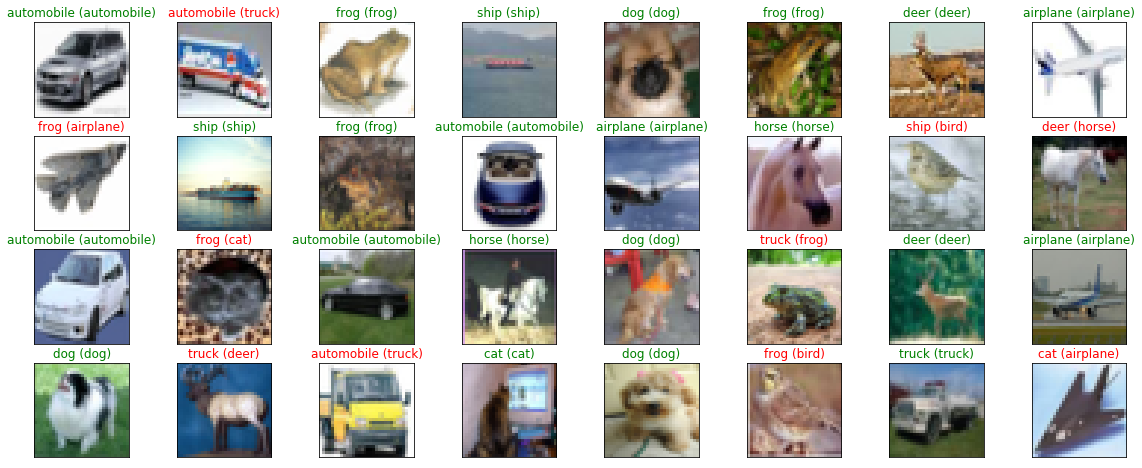

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))